In [202]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
from IPython.display import display, HTML
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [203]:
data = pd.read_csv('DataA.csv', index_col=0)
print(data.shape)
display(data.head(5))

(19000, 81)


,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.34,fea.35,fea.36,fea.37,fea.38,fea.39,fea.40,fea.41,fea.42,fea.43,fea.44,fea.45,fea.46,fea.47,fea.48,fea.49,fea.50,fea.51,fea.52,fea.53,fea.54,fea.55,fea.56,fea.57,fea.58,fea.59,fea.60,fea.61,fea.62,fea.63,fea.64,fea.65,fea.66,fea.67,fea.68,fea.69,fea.70,fea.71,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
1,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,-19.0,-587.0,810.0,902.0,-140.0,-468.0,-28.0,1016.0,-191.0,358.0,895.0,-189.0,-511.0,-782.0,-212.0,-241.0,472.0,938.0,-882.0,-61.0,543.0,141.0,-150.0,965.0,NaN,NaN,NaN,-989.0,-158.0,41.0,78.0,-49.0,-13.0,643.0,104.0,924.0,-717.0,62.0,-691.0,63.0,-268.0,937.0,217.0,-249.0,29.0,-141.0,-469.0,-571.0,292.0,-314.0,-84.0,-624.0,-711.0,761.0,-63.0,583.0,254.0,101.0,-205.0,-156.0,631.0,-163.0,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
2,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,9.0,-605.0,835.0,897.0,-136.0,-473.0,-38.0,989.0,-160.0,346.0,889.0,-215.0,-609.0,-773.0,-202.0,-255.0,509.0,934.0,-878.0,-50.0,515.0,130.0,-179.0,995.0,NaN,NaN,NaN,-991.0,-157.0,43.0,48.0,-85.0,1.0,644.0,107.0,922.0,-718.0,61.0,-690.0,63.0,-273.0,925.0,214.0,-344.0,45.0,-134.0,-469.0,-578.0,285.0,-316.0,-80.0,-620.0,-714.0,759.0,-62.0,590.0,321.0,184.0,-242.0,-160.0,629.0,-169.0,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
3,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,-10.0,-580.0,802.0,902.0,-139.0,-454.0,-19.0,992.0,-170.0,345.0,898.0,-200.0,-606.0,-753.0,-116.0,-272.0,492.0,919.0,-864.0,-56.0,540.0,122.0,-162.0,946.0,NaN,NaN,NaN,-988.0,-171.0,41.0,68.0,-68.0,-8.0,642.0,109.0,919.0,-719.0,60.0,-689.0,64.0,-276.0,936.0,211.0,-393.0,97.0,-195.0,-465.0,-584.0,276.0,-317.0,-74.0,-616.0,-717.0,773.0,-41.0,601.0,404.0,191.0,-311.0,-165.0,626.0,-178.0,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
4,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,34.0,-579.0,849.0,910.0,-151.0,-460.0,-18.0,1015.0,-185.0,345.0,888.0,-220.0,-638.0,-718.0,-354.0,-275.0,517.0,919.0,-847.0,-66.0,546.0,145.0,-144.0,939.0,NaN,NaN,NaN,-994.0,-159.0,42.0,32.0,-95.0,4.0,640.0,114.0,915.0,-720.0,60.0,-688.0,65.0,-272.0,926.0,231.0,-446.0,75.0,-199.0,-464.0,-593.0,265.0,-319.0,-69.0,-611.0,-721.0,761.0,-13.0,598.0,450.0,203.0,-283.0,-173.0,620.0,-187.0,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
5,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,60.0,-584.0,843.0,917.0,-151.0,-463.0,-12.0,996.0,-209.0,345.0,886.0,-204.0,-723.0,-679.0,-220.0,-271.0,525.0,923.0,-862.0,-70.0,531.0,153.0,-167.0,970.0,NaN,NaN,NaN,-1002.0,-161.0,42.0,58.0,-145.0,17.0,640.0,116.0,910.0,-722.0,59.0,-687.0,65.0,-293.0,897.0,221.0,-510.0,142.0,-238.0,-460.0,-600.0,251.0,-320.0,-61.0,-607.0,-725.0,741.0,-11.0,612.0,552.0,179.0,-334.0,-178.0,617.0,-199.0,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


In [204]:
data.describe()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.34,fea.35,fea.36,fea.37,fea.38,fea.39,fea.40,fea.41,fea.42,fea.43,fea.44,fea.45,fea.46,fea.47,fea.48,fea.49,fea.50,fea.51,fea.52,fea.53,fea.54,fea.55,fea.56,fea.57,fea.58,fea.59,fea.60,fea.61,fea.62,fea.63,fea.64,fea.65,fea.66,fea.67,fea.68,fea.69,fea.70,fea.71,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
count,17813.000000,17812.000000,17813.000000,18200.000000,18200.000000,18200.000000,18099.000000,18099.000000,18099.000000,18043.000000,18044.000000,18044.000000,17950.000000,17950.000000,17950.000000,18202.000000,18202.000000,18202.000000,17964.000000,17964.000000,17964.000000,17677.000000,17677.000000,17677.000000,18106.000000,18106.000000,18106.000000,18106.000000,18106.000000,18106.000000,18083.000000,18083.000000,18083.000000,1.0,1.0,1.0,18227.000000,18227.000000,18227.000000,18227.00000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.00000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18226.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000
mean,-132.812384,698.264485,597.541402,-307.128462,909.548077,-32.760824,61.974363,899.313498,81.650478,356.638752,330.971569,584.833130,583.589861,421.624290,-38.719833,71.807768,780.358257,-461.605043,274.476843,893.086451,-89.299933,-622.139334,233.764044,-131.400068,-360.661825,875.943278,269.614934,-570.500166,432.334420,427.547277,-124.834707,369.141625,646.348062,0.0,0.0,0.0,-862.982169,-209.995885,209.005047,-0.55736,-7.673890,-9.025347,489.460306,83.230153,209.654194,330.984199,-66.071981,290.883086,6.278762,-817.288473,140.022110,294.320568,13.456027,-9.604268,-8.376420,279.558786,-267.420091,-105.234158,204.50107,-135.484611,197.207714,299.903166,-200.212322,555.226532,443.874637,1.923355,1.402535,-3.169364,-70.556537,-90.936080,-227.353157,-124.658035,-37.973391,137.400176,374.762934,-880.583804,-47.607780,137.641192,-18.099523,4.671257,20.726834
std,284.183187,375.672475,396.654659,183.151634,193.963300,254.001018,317.393784,196.829252,327.904371,343.131382,543.517364,282.078053,307.610433,543.293018,495.913749,258.937246,291.642323,261.243774,298.191766,216.179301,221.071614,359.196753,587.480524,460.080469,223.329186,253.761954,371.407492,307.329729,497.493607,204.477583,369.363351,523.492523,287.282436,NaN,NaN,NaN,204.443034,252.273113,288.117323,622.00637,328.654972,248.500906,344.436164,366.809464,552.049211,521.513609,322.307191,452.056841,470.386277,240.623758,409.226342,229.603664,838.521518,518.143698,560.794366,396.007945,550.994437,385.236647,460.46979,337.120625,421.161877,554.948504,573.494633,339.780793,298.892877,1020.487633,700.587030,867.141376,580.008611,480.162249,379.058945,481.492994,355.841529,352.788441,583.792739,217.634117,373.064609,248.988603,778.015520,480.779966,455.160604
min,-2724.000000,-855.000000,-2196.000000,-1365.000000,-245.000000,-920.000000,-1580.000000,-149.000000,-1624.000000,-1792.000000,-1545.000000,-1079.000000,-1710.000000,-1120.000000,-1634.000000,-1089.000000,-289.000000,-1379.000000,-2269.000000,-786.000000,-1944.000000,-3172.000000,-2324.000000,-2734.000000,-1873.000000,-442.000000,-1430.000000,-1933.000000,-1103.000000,-765.000000,-1717.000000,-1234.000000,-784.000000,0.0,0.0,0.0,-1578.000000,-887.000000,-1067.000000,-3322.00000,-2764.000000,-1293.000000,-767.000000,-985.000000,-975.000000,-876.000000,-705.000000,-702.000000,-983.000000,-1884.000000,-1516.000000,-1671.000000,-12310.000000,-5226.000000,-3541

# I. Data Cleaning and Preprocessing (for dataset A)
## 1. Detect any problems that need to be fixed in the dataset A. Report such problems

### Find missing values

In [205]:
data.isna().sum().sum()

124053

Missing values are indicated by NaN values in the dataframe. We found that there were over 124000 values that were missing in the dataset. 

### Find Outliers

To find outliers the standard deviation of the values was determined and used to find values that vary by more than 3 standard deviations. Since the features are measurements of 

There are over 14000 data points that vary from the features mean by over 3 standard deviations.

## 2. Fix the detected problems using some of the methods discussed in class
### Fix missing values

In [206]:
# data = data.apply(lambda x: x.fillna(x.mean()),axis=0)
data = data.fillna(data.mean())
print(data.isna().sum().sum())

0


All the missing values were replaced with the mean value of the feature.

### Fix outliers  
Outliers were detected using the method above. The data points that were identified as outliers were then replaced with the mean value of the feature.

In [207]:
feat_std = data.std()
feat_mean = data.mean()
threshold = 3

# Find the outliers and label them as true
outliers = data.apply(lambda x: np.abs(x - feat_mean) > threshold * feat_std , axis=1)
print('There are: ', outliers.sum().sum(), 'outliers')

# replace all the outliers with NaN
v = data.values
mask = outliers.values
data = pd.DataFrame(np.where(mask, np.nan, v), data.index, data.columns)
print(data.isna().sum().sum(), ' outliers have been replaced with NaN')

# Replace Nan values with mean()
#data = data.dropna()  # drop all samples with an outlier in one of its features
data = data.fillna(data.mean()) # set the outlier to the mean of the feature

print('There are : ', data.isna().sum().sum(), ' NaN values after the replace')
data.head(10)

There are:  16323 outliers
16323  outliers have been replaced with NaN
There are :  0  NaN values after the replace


,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.34,fea.35,fea.36,fea.37,fea.38,fea.39,fea.40,fea.41,fea.42,fea.43,fea.44,fea.45,fea.46,fea.47,fea.48,fea.49,fea.50,fea.51,fea.52,fea.53,fea.54,fea.55,fea.56,fea.57,fea.58,fea.59,fea.60,fea.61,fea.62,fea.63,fea.64,fea.65,fea.66,fea.67,fea.68,fea.69,fea.70,fea.71,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
1,-153.0,414.000000,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,-19.0,-587.0,810.0,902.0,-140.0,-468.0,-28.0,1016.0,-191.0,358.0,895.0,-189.0,-511.0,-782.0,-212.0,-241.0,472.0,938.0,-882.0,-61.0,543.0,141.0,-150.0,965.0,0.0,0.0,0.0,-989.0,-158.0,41.0,78.0,-49.0,-13.0,643.0,104.0,924.0,-717.0,62.0,-691.0,63.0,-268.0,937.0,217.0,-249.0,29.0,-141.0,-469.0,-571.0,292.0,-314.0,-84.0,-624.0,-711.0,761.0,-63.0,583.0,254.0,101.0,-205.0,-156.0,631.0,-163.0,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
2,-150.0,420.000000,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,9.0,-605.0,835.0,897.0,-136.0,-473.0,-38.0,989.0,-160.0,346.0,889.0,-215.0,-609.0,-773.0,-202.0,-255.0,509.0,934.0,-878.0,-50.0,515.0,130.0,-179.0,995.0,0.0,0.0,0.0,-991.0,-157.0,43.0,48.0,-85.0,1.0,644.0,107.0,922.0,-718.0,61.0,-690.0,63.0,-273.0,925.0,214.0,-344.0,45.0,-134.0,-469.0,-578.0,285.0,-316.0,-80.0,-620.0,-714.0,759.0,-62.0,590.0,321.0,184.0,-242.0,-160.0,629.0,-169.0,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
3,-160.0,432.000000,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,-10.0,-580.0,802.0,902.0,-139.0,-454.0,-19.0,992.0,-170.0,345.0,898.0,-200.0,-606.0,-753.0,-116.0,-272.0,492.0,919.0,-864.0,-56.0,540.0,122.0,-162.0,946.0,0.0,0.0,0.0,-988.0,-171.0,41.0,68.0,-68.0,-8.0,642.0,109.0,919.0,-719.0,60.0,-689.0,64.0,-276.0,936.0,211.0,-393.0,97.0,-195.0,-465.0,-584.0,276.0,-317.0,-74.0,-616.0,-717.0,773.0,-41.0,601.0,404.0,191.0,-311.0,-165.0,626.0,-178.0,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
4,-171.0,432.000000,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,34.0,-579.0,849.0,910.0,-151.0,-460.0,-18.0,1015.0,-185.0,345.0,888.0,-220.0,-638.0,-718.0,-354.0,-275.0,517.0,919.0,-847.0,-66.0,546.0,145.0,-144.0,939.0,0.0,0.0,0.0,-994.0,-159.0,42.0,32.0,-95.0,4.0,640.0,114.0,915.0,-720.0,60.0,-688.0,65.0,-272.0,926.0,231.0,-446.0,75.0,-199.0,-464.0,-593.0,265.0,-319.0,-69.0,-611.0,-721.0,761.0,-13.0,598.0,450.0,203.0,-283.0,-173.0,620.0,-187.0,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
5,-171.0,698.264485,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,60.0,-584.0,843.0,917.0,-151.0,-463.0,-12.0,996.0,-209.0,345.0,886.0,-204.0,-723.0,-679.0,-220.0,-271.0,525.0,923.0,-862.0,-70.0,531.0,153.0,-167.0,970.0,0.0,0.0,0.0,-1002.0,-161.0,42.0,58.0,-145.0,17.0,640.0,116.0,910.0,-722.0,59.0,-687.0,65.0,-293.0,897.0,221.0,-510.0,142.0,-238.0,-460.0,-600.0,251.0,-320.0,-61.0,-607.0,-725.0,741.0,-11.0,612.0,552.0,179.0,-334.0,-178.0,617.0,-199.0,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0
6,-171.0,432.000000,924.0,-179.0,1011.0,85.0,-204.0,945.0,336.0,94.0,-583.0,827.0,892.0,-140.0,-455.0,-32.0,1012.0,-204.0,345.0,895.0,-211.0,-787.0,-687.0,-184.0,-298.0,548.0,934.0,-869.0,-53.0,534.0,138.0,-142.0,980.0,0.0,0.0,0.0,-993.0,-163.0,51.0,79.0,-98.0,4.0,641.0,119.0,906.0,-723.0,57.0,-686.0,66.0,-298.0,910.0,235.0,-531.0,149.0,-270.0,-455.0,-608.0,242.0,-322.0,-54.0,-601.0,-729.0,763.0,16.0,619.0,552.0,180.0,-365.0,-183.0,611.0,-209.0,655.0,-274.0,-323.0,-626.0,-969.0,-267.0,27.0,-36.0,32.0,9.0
7,-169.0,429.000000,949.0,-175.0,1007.0,102.0,-188.0,914.0,322.0,154.0,-578.0,805.0,910.0,-161.0,-454.0,-26.0,996.0,-219.0,345.0,896.0,-212.0,-718.0,-690.0,-227.0,-279.0,541.0,890.0,-851.0,-59.0,530.0,121.0,-147.0,955.0,0.0,0.0,0.0,-990.0,-171.0,43.0,56.0,-111.0,0.0,643.0,120.0,902.0,-724.0,57.0,-684.0,67.0,-303.0,923.0,275.0,-579.0,196.0,-286.0,-452.0,-619.0,228.0,-324.0

## 3. Normalize the data using min-max and z-score normalization. Plot histograms of feature 9 and 24; compare and comment on the differences before and after normalization.

### **Min-max normalization**

In [208]:
# Calculating min max scaling using sklearn
minmax_scale = preprocessing.MinMaxScaler().fit(data)
data_minmax = minmax_scale.transform(data)
data_minmax = pd.DataFrame(data_minmax)
data_minmax.columns = data.columns
data_minmax.index = data.index
display(data_minmax.describe())
display(data_minmax.head())

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.34,fea.35,fea.36,fea.37,fea.38,fea.39,fea.40,fea.41,fea.42,fea.43,fea.44,fea.45,fea.46,fea.47,fea.48,fea.49,fea.50,fea.51,fea.52,fea.53,fea.54,fea.55,fea.56,fea.57,fea.58,fea.59,fea.60,fea.61,fea.62,fea.63,fea.64,fea.65,fea.66,fea.67,fea.68,fea.69,fea.70,fea.71,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
count,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.0,19000.0,19000.0,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000
mean,0.518954,0.496420,0.499878,0.507713,0.521454,0.474582,0.501649,0.523784,0.504335,0.496175,0.497658,0.503247,0.498938,0.498661,0.486651,0.526881,0.512156,0.500114,0.517620,0.500122,0.501190,0.499192,0.492637,0.498674,0.500441,0.519733,0.502549,0.492760,0.506140,0.503477,0.503222,0.504937,0.501425,0.0,0.0,0.0,0.484191,0.449539,0.485967,0.499387,0.497502,0.503904,0.581632,0.497751,0.541185,0.667949,0.454753,0.637690,0.500141,0.495657,0.508899,0.498406,0.499997,0.498941,0.500119,0.507615,0.382176,0.436435,0.628307,0.443628,0.616413,0.632109,0.506440,0.500798,0.500937,0.498544,0.497710,0.502421,0.431988,0.575224,0.496444,0.435511,0.500631,0.593726,0.685206,0.475342,0.499951,0.504427,0.500396,0.507588,0.502068
std,0.112083,0.157314,0.154318,0.159849,0.115933,0.106627,0.160878,0.119118,0.166544,0.164816,0.169896,0.163572,0.158234,0.170705,0.169271,0.104688,0.146283,0.163852,0.103503,0.117184,0.146065,0.156947,0.170369,0.163368,0.158245,0.129388,0.167030,0.166202,0.169559,0.162832,0.166054,0.168127,0.167022,0.0,0.0,0.0,0.138617,0.103393,0.169122,0.142613,0.134325,0.141506,0.136847,0.167374,0.247009,0.282675,0.224685,0.284371,0.232921,0.155065,0.170626,0.149627,0.132146,0.115505,0.137514,0.168532,0.212719,0.181975,0.253801,0.234178,0.266476,0.285624,0.170724,0.159908,0.159668,0.119822,0.133911,0.133378,0.229902,0.190407,0.160103,0.247948,0.214083,0.225841,0.288348,0.112764,0.164085,0.151317,0.136364,0.107574,0.129097
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.483910,0.348165,0.382327,0.418779,0.484982,0.428668,0.402045,0.484743,0.386352,0.402617,0.351447,0.379902,0.377579,0.326755,0.339482,0.470976,0.471930,0.386780,0.499425,0.494043,0.428460,0.387657,0.374962,0.382442,0.420811,0.456199,0.38

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.34,fea.35,fea.36,fea.37,fea.38,fea.39,fea.40,fea.41,fea.42,fea.43,fea.44,fea.45,fea.46,fea.47,fea.48,fea.49,fea.50,fea.51,fea.52,fea.53,fea.54,fea.55,fea.56,fea.57,fea.58,fea.59,fea.60,fea.61,fea.62,fea.63,fea.64,fea.65,fea.66,fea.67,fea.68,fea.69,fea.70,fea.71,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
1,0.488767,0.369725,0.649169,0.641315,0.586572,0.589588,0.353606,0.543156,0.635696,0.306492,0.202572,0.639706,0.677635,0.317049,0.334871,0.435356,0.638012,0.678665,0.547756,0.501191,0.423017,0.553038,0.185667,0.469103,0.591431,0.228437,0.811661,0.318514,0.333683,0.599496,0.627040,0.333663,0.693705,0.0,0.0,0.0,0.393990,0.514467,0.384942,0.521477,0.479481,0.497601,0.642581,0.507456,0.867519,0.087991,0.545907,0.007065,0.528817,0.890149,0.850171,0.442465,0.446610,0.512364,0.460322,0.179991,0.262515,0.636860,0.336522,0.480142,0.085917,0.100893,0.798723,0.190166,0.579157,0.541890,0.524423,0.459709,0.397410,0.870729,0.528751,0.845426,0.329853,0.306536,0.185073,0.441223,0.400093,0.422497,0.497702,0.519625,0.501502
2,0.490589,0.372477,0.649169,0.626291,0.587456,0.592292,0.355221,0.535310,0.626772,0.320584,0.196785,0.655025,0.674847,0.318344,0.333097,0.428760,0.622222,0.698953,0.540852,0.496426,0.402799,0.505786,0.188388,0.472871,0.580719,0.253369,0.809810,0.320765,0.337526,0.575987,0.621911,0.324102,0.711864,0.0,0.0,0.0,0.392321,0.515173,0.386157,0.513269,0.460779,0.507197,0.643133,0.508854,0.866606,0.087438,0.545196,0.007707,0.528817,0.886605,0.845034,0.440238,0.427324,0.517639,0.462451,0.179991,0.259756,0.633383,0.335397,0.482979,0.088501,0.099317,0.798115,0.190667,0.583144,0.553117,0.544593,0.452437,0.395791,0.869905,0.526056,0.845426,0.334152,0.305229,0.184065,0.441223,0.399630,0.419753,0.497264,0.523587,0.493619
3,0.484517,0.377982,0.650044,0.640376,0.564488,0.588911,0.360065,0.532694,0.626247,0.311022,0.204823,0.634804,0.677635,0.317373,0.339837,0.441293,0.623977,0.692408,0.540276,0.503574,0.414463,0.507232,0.194436,0.505275,0.567712,0.241914,0.802869,0.328644,0.335430,0.596977,0.618182,0.329707,0.682203,0.0,0.0,0.0,0.394825,0.505293,0.384942,0.518741,0.469610,0.501028,0.642030,0.509786,0.865235,0.086884,0.544484,0.008349,0.529323,0.884479,0.849743,0.438010,0.417377,0.534784,0.443904,0.181739,0.257391,0.628912,0.334834,0.487234,0.091085,0.097740,0.802372,0.201204,0.589408,0.567024,0.546294,0.438876,0.393768,0.868670,0.522013,0.845426,0.338452,0.302614,0.183056,0.432602,0.397317,0.413580,0.495732,0.513864,0.492492
4,0.477838,0.377982,0.636920,0.629108,0.579505,0.600406,0.365985,0.517001,0.638320,0.333166,0.205145,0.663603,0.682097,0.313491,0.337708,0.441953,0.637427,0.682592,0.540276,0.495631,0.398911,0.491803,0.205020,0.415599,0.565417,0.258760,0.802869,0.338210,0.331936,0.602015,0.628904,0.335641,0.677966,0.0,0.0,0.0,0.389816,0.513761,0.385549,0.508892,0.455584,0.509253,0.640927,0.512116,0.863408,0.086331,0.544484,0.008992,0.529828,0.887314,0.845462,0.452858,0.406618,0.527530,0.442688,0.182176,0.253843,0.623448,0.333708,0.490780,0.094315,0.095638,0.798723,0.215253,0.587699,0.574732,0.549210,0.444379,0.390530,0.866200,0.517969,0.845426,0.343980,0.300000,0.182552,0.434169,0.397780,0.416324,0.492887,0.518545,0.492117
5,0.477838,0.500121,0.644794,0.615023,0.583922,0.592968,0.360065,0.535310,0.644619,0.346251,0.203537,0.659926,0.686001,0.313491,0.336644,0.445910,0.626316,0.666885,0.540276,0.494043,0.411353,0.450820,0.216813,0.466089,0.568477,0.264151,0.804720,0.329769,0.330538,0.589421,0.632634,0.328058,0.696731,0.0,0.0,0.0,0.383139,0.512350,0.385549,0.516005,0.429610,0.518163,0.640927,0.513048,0.861124,0.085224,0.543772,0.009634,0.529828,0.872431,0.833048,0.445434,0.393626,0.549621,0.430830,0.183923,0.251084,0.616493,0.333146,0.496454,0.096899,0.093537,0.792642,0.216257,0.595672,0.591

### **z-score normalization**

In [209]:
# calculatig the z-score normalization using sklearn
std_scale = preprocessing.StandardScaler().fit(data)
data_zscore = pd.DataFrame(std_scale.transform(data))
data_zscore.columns = data.columns
data_zscore.index = data.index
display(data_zscore.describe())
display(data_zscore.head())


,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.34,fea.35,fea.36,fea.37,fea.38,fea.39,fea.40,fea.41,fea.42,fea.43,fea.44,fea.45,fea.46,fea.47,fea.48,fea.49,fea.50,fea.51,fea.52,fea.53,fea.54,fea.55,fea.56,fea.57,fea.58,fea.59,fea.60,fea.61,fea.62,fea.63,fea.64,fea.65,fea.66,fea.67,fea.68,fea.69,fea.70,fea.71,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
count,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,19000.0,19000.0,19000.0,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04,1.900000e+04
mean,1.697151e-16,-3.444839e-15,-3.749418e-15,-2.630820e-16,1.058513e-15,-8.727317e-16,-5.048350e-16,1.209080e-15,1.370174e-16,-1.797908e-15,-1.018266e-16,-5.288699e-16,-1.973845e-16,2.341451e-16,6.438412e-16,3.851334e-16,1.175760e-15,3.191984e-16,1.096754e-16,-2.816372e-15,-4.750586e-17,-8.719382e-18,-2.286935e-15,-3.298353e-16,4.130544e-16,4.017605e-16,-5.213697e-16,-5.187897e-16,-7.206512e-17,-4.079598e-16,8.798569e-16,-2.569285e-16,-2.506226e-16,0.0,0.0,0.0,-6.658869e-16,-6.888057e-17,5.135180e-16,-8.744467e-18,-7.251875e-18,1.951977e-16,1.367050e-15,3.707688e-15,-3.713243e-16,2.696949e-15,-2.418416e-16,-1.420209e-16,-6.209315e-17,-3.380629e-16,-5.915989e-16,4.775339e-16,2.104832e-17,2.292939e-17,-6.618842e-17,3.838884e-17,-2.415991e-16,2.802721e-15,-2.036383e-18,3.176640e-16,5.624302e-16,1.418538e-15,8.752088e-16,-2.146844e-16,3.757433e-16,5.110386e-17,-5.864680e-17,-3.324972e-17,9.658473e-16,-6.045104e-16,5.034219e-16,-4.818762e-16,4.876801e-16,6.911891e-17,2.584004e-16,-6.041658e-17,2.823409e-16,-2.106170e-16,-1.442071e-17,-4.869031e-17,9.529530e-17
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,0.0,0.0,0.0,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-4.630191e+00,-3.155680e+00,-3.239367e+00,-3.176289e+00,-4.498030e+00,-4.450974e+00,-3.118283e+00,-4.397311e+00,-3.028328e+00,-3.010560e+00,-2.929265e+00,-3.076690e+00,-3.153244e+00,-2.921258e+00,-2.875052e+00,-5.032995e+00,-3.501224e+00,-3.052307e+00,-5.001128e+00,-4.267956e+00,-3.431380e

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.34,fea.35,fea.36,fea.37,fea.38,fea.39,fea.40,fea.41,fea.42,fea.43,fea.44,fea.45,fea.46,fea.47,fea.48,fea.49,fea.50,fea.51,fea.52,fea.53,fea.54,fea.55,fea.56,fea.57,fea.58,fea.59,fea.60,fea.61,fea.62,fea.63,fea.64,fea.65,fea.66,fea.67,fea.68,fea.69,fea.70,fea.71,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
1,-0.269330,-0.805388,0.967448,0.835819,0.561704,1.078601,-0.920246,0.162633,0.788765,-1.150908,-1.736903,0.834269,1.129355,-1.063917,-0.896694,-0.874288,0.860382,1.089737,0.291169,0.009124,-0.535207,0.343088,-1.801843,-0.181014,0.575009,-2.251409,1.850691,-1.048423,-1.017122,0.589696,0.745662,-1.018745,1.151248,0.0,0.0,0.0,-0.650740,0.627988,-0.597364,0.154905,-0.134164,-0.044541,0.445397,0.057985,1.321179,-2.051730,0.405710,-2.217675,0.123118,2.544106,2.000179,-0.373883,-0.404011,0.116216,-0.289410,-1.944032,-0.562545,1.101423,-1.149687,0.155928,-1.990834,-1.859893,1.712067,-1.942625,0.489904,0.361762,0.199488,-0.320238,-0.150410,1.552003,0.201794,1.653276,-0.797739,-1.271678,-1.734524,-0.302579,-0.608596,-0.541461,-0.019757,0.111904,-0.004388
2,-0.253078,-0.787892,0.967448,0.741832,0.569324,1.103966,-0.910210,0.096759,0.735181,-1.065407,-1.770971,0.927922,1.111731,-1.056336,-0.907172,-0.937299,0.752441,1.213559,0.224460,-0.031546,-0.673627,0.042012,-1.785869,-0.157949,0.507318,-2.058707,1.839609,-1.034879,-0.994454,0.445312,0.714779,-1.075617,1.259978,0.0,0.0,0.0,-0.662784,0.634814,-0.590183,0.097349,-0.273392,0.023271,0.449428,0.066337,1.317480,-2.053688,0.402542,-2.215416,0.123118,2.521253,1.970071,-0.388769,-0.549955,0.161889,-0.273932,-1.944032,-0.575516,1.082313,-1.154122,0.168042,-1.981137,-1.865413,1.708505,-1.939487,0.514871,0.455457,0.350116,-0.374761,-0.157451,1.547679,0.184958,1.653276,-0.777654,-1.277466,-1.738022,-0.302579,-0.611415,-0.559592,-0.022968,0.148728,-0.065451
3,-0.307250,-0.752900,0.973117,0.829945,0.371202,1.072260,-0.880099,0.074801,0.732029,-1.123426,-1.723655,0.804300,1.129355,-1.062022,-0.867353,-0.817578,0.764434,1.173616,0.218900,0.029459,-0.593770,0.051229,-1.750370,0.040406,0.425121,-2.147246,1.798051,-0.987475,-1.006818,0.574226,0.692318,-1.042278,1.082386,0.0,0.0,0.0,-0.644718,0.539253,-0.597364,0.135720,-0.207646,-0.020322,0.441367,0.071905,1.311932,-2.055646,0.399374,-2.213158,0.125289,2.507541,1.997670,-0.403654,-0.625231,0.310325,-0.408807,-1.933663,-0.586634,1.057743,-1.156339,0.186214,-1.971440,-1.870932,1.733439,-1.873592,0.554105,0.571528,0.362819,-0.476440,-0.166253,1.541192,0.159705,1.653276,-0.757569,-1.289042,-1.741520,-0.379030,-0.625509,-0.600388,-0.034203,0.058343,-0.074174
4,-0.366840,-0.752900,0.888074,0.759454,0.500743,1.180061,-0.843298,-0.056947,0.804525,-0.989067,-1.721762,0.980368,1.157553,-1.084765,-0.879928,-0.811277,0.856384,1.113702,0.218900,-0.038324,-0.700247,-0.047082,-1.688246,-0.508530,0.410616,-2.017042,1.798051,-0.929913,-1.027426,0.605165,0.756893,-1.006978,1.057016,0.0,0.0,0.0,-0.680850,0.621162,-0.593774,0.066653,-0.312067,0.037802,0.433305,0.085826,1.304534,-2.057603,0.399374,-2.210899,0.127459,2.525824,1.972580,-0.304419,-0.706653,0.247525,-0.417651,-1.931070,-0.603311,1.027714,-1.160774,0.201357,-1.959319,-1.878291,1.712067,-1.785732,0.543405,0.635856,0.384597,-0.435179,-0.180335,1.528219,0.134451,1.653276,-0.731745,-1.300619,-1.743269,-0.365130,-0.622691,-0.582256,-0.055069,0.101862,-0.077082
5,-0.366840,0.023526,0.939100,0.671341,0.538844,1.110307,-0.880099,0.096759,0.842350,-0.909673,-1.731225,0.957891,1.182226,-1.084765,-0.886215,-0.773471,0.780425,1.017840,0.218900,-0.051881,-0.615065,-0.308219,-1.619023,-0.199465,0.429956,-1.975376,1.809133,-0.980703,-1.035669,0.527817,0.779354,-1.052084,1.169370,0.0,0.0,0.0,-0.729026,0.607511,-0.593774,0.116535,-0.505439,0.100771,0.433305,0.091394,1.295287,-2.06

### Plot histogram for feature 9 and 24

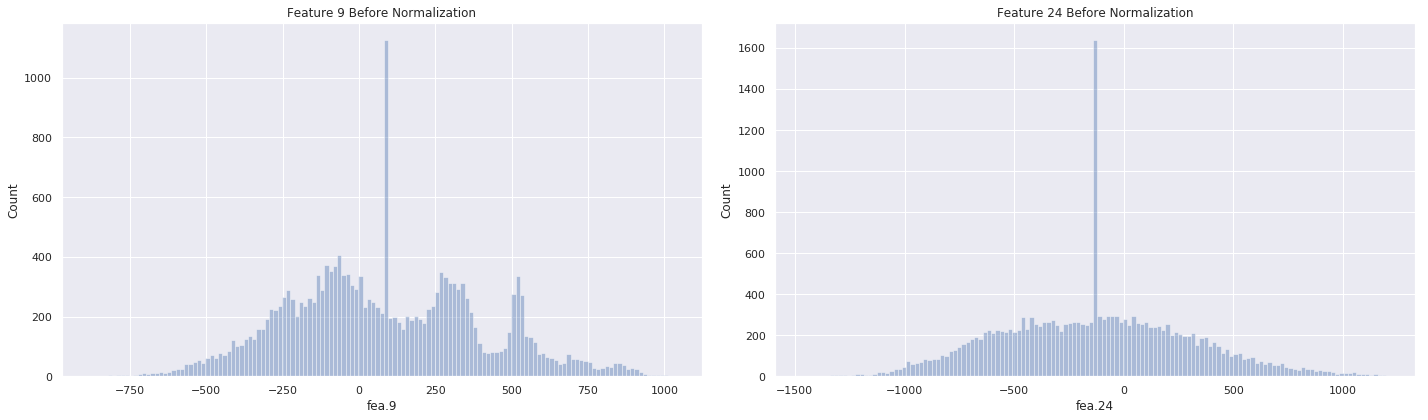

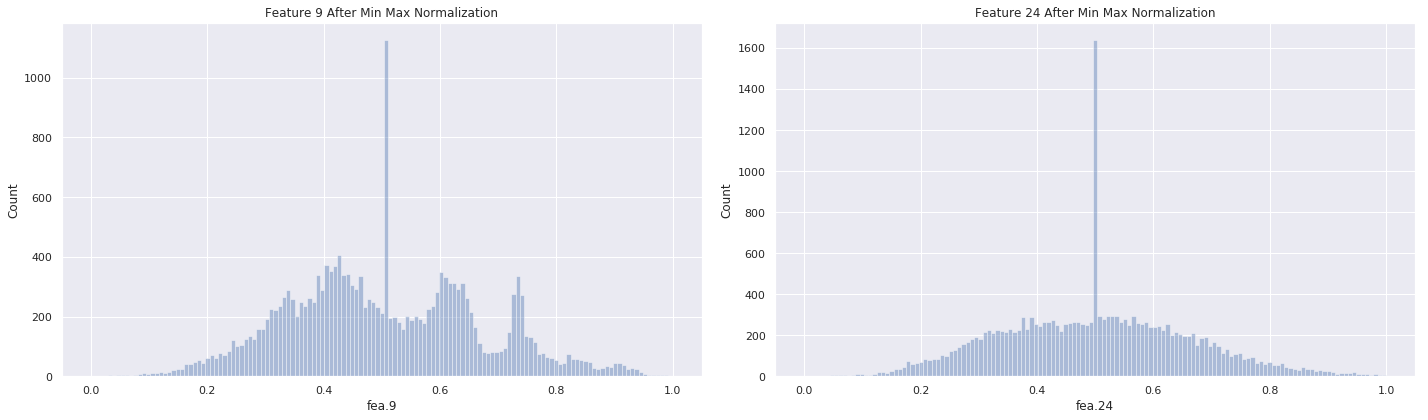

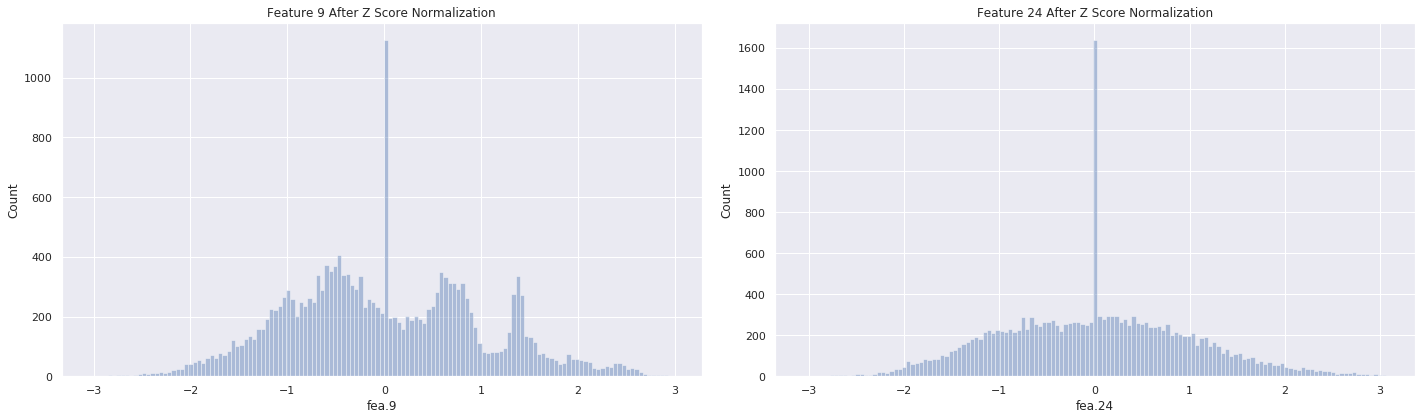

In [210]:
sns.set()
# set figure size and subplot
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

# plot feature 9 without normalization
feat9 = data['fea.9']
n_bins = int(np.sqrt(len(feat9)))
ax = sns.distplot(feat9, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 9 Before Normalization')

# plot feature 24 with min max
plt.subplot(1, 2, 2)
feat24 = data['fea.24']
n_bins = int(np.sqrt(len(feat24)))
ax = sns.distplot(feat24, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 24 Before Normalization')
plt.tight_layout()
plt.show()

# set figure size and subplot
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

# plot feature 9 with min max
feat9 = data_minmax['fea.9']
n_bins = int(np.sqrt(len(feat9)))
ax = sns.distplot(feat9, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 9 After Min Max Normalization')

# plot feature 24 with min max
plt.subplot(1, 2, 2)
feat24 = data_minmax['fea.24']
n_bins = int(np.sqrt(len(feat24)))
ax = sns.distplot(feat24, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 24 After Min Max Normalization')
plt.tight_layout()
plt.show()

#set fogure and subplot
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

# plot feature 9 with z score
feat9 = data_zscore['fea.9']
n_bins = int(np.sqrt(len(feat9)))
ax = sns.distplot(feat9, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 9 After Z Score Normalization')

# plot feature 24 with z score
plt.subplot(1, 2, 2)
feat24 = data_zscore['fea.24']
n_bins = int(np.sqrt(len(feat24)))
ax = sns.distplot(feat24, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 24 After Z Score Normalization')
plt.tight_layout()
plt.show()